In [1]:
%matplotlib inline
from scipy.integrate import odeint  
import numpy as np
from matplotlib import pyplot as plt

P1ss = 3529.666458243191
P2ss = 0.08625285376923068


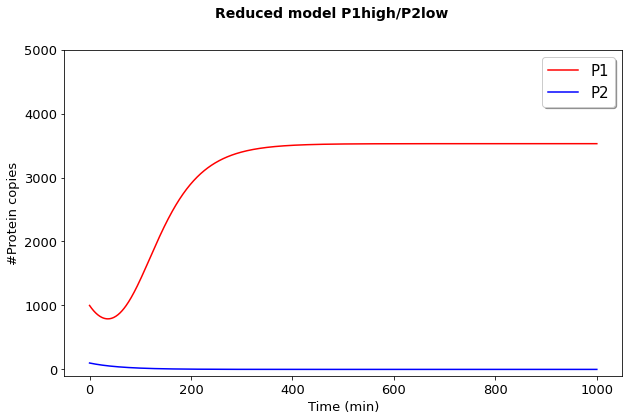

In [2]:
#Reduced model simulation highP1/lowP2

def sdot_toggle(s,t,params):
    # define parametres and variables
    P1, P2 = s
    kp1, kp2, kdp1, kdp2, K1, K2, n1, n2 = params
    
    # define ODE rate equations
    rate_P1_production = kp1 * ((K2**n2)/(P2**n2 + K2**n2))
    rate_P2_production = kp2 * ((K1**n1)/(P1**n1 + K1**n1))
    rate_P1_loss = -kdp1*P1
    rate_P2_loss = -kdp2*P2
    dP1 = rate_P1_production + rate_P1_loss
    dP2 = rate_P2_production + rate_P2_loss
    dsdt = [dP1, dP2]
    return dsdt

#params
kp1= 58.24
kp2= 17.38
#kp1= 0.9726
#kp2= 1.170
kdp1 = 0.0165
kdp2 = 0.0165
K1 = 31.94
K2 = 30.0
n1 = 2.0
n2 = 2.0
params = [kp1, kp2, kdp1, kdp2, K1, K2, n1, n2]

# define list of observation points 't_obs'
t_start = 0
t_end = 1000
n_obs = 1000
t_obs = np.linspace(t_start, t_end, n_obs)

# Define initial conditions
# Use the odeint function to simulate system
# unpack s_obs into variable observations
P1 = 1000
P2 = 100

s0 = [P1,P2]

s_obs = odeint(sdot_toggle, s0, t_obs, args=(params,))

P1_obs = s_obs[:,0]
P2_obs = s_obs[:,1]

print(f'P1ss = {P1_obs[-1]}')
print(f'P2ss = {P2_obs[-1]}')

# Plot results
fig = plt.figure(figsize=(10,6))
fig.suptitle('Reduced model P1high/P2low ', 
              fontsize=14, fontweight='bold')
axes1 = fig.add_subplot(1,1,1)

axes1.plot(t_obs, P1_obs, 'r-', label='P1')
axes1.plot(t_obs, P2_obs, 'b-', label='P2')

axes1.set_ylabel('#Protein copies')
axes1.set_xlabel('Time (min)')

axes1.xaxis.label.set_size(13)
axes1.yaxis.label.set_size(13)
axes1.xaxis.set_tick_params(labelsize=13)
axes1.yaxis.set_tick_params(labelsize=13)

axes1.set_ylim(-100,5000)
axes1.legend(loc = 'upper right', prop={'size': 15}, shadow=True)

plt.savefig('reduced_highP1.png');

P1ss = 2.9086629080040525
P2ss = 1044.664307876301


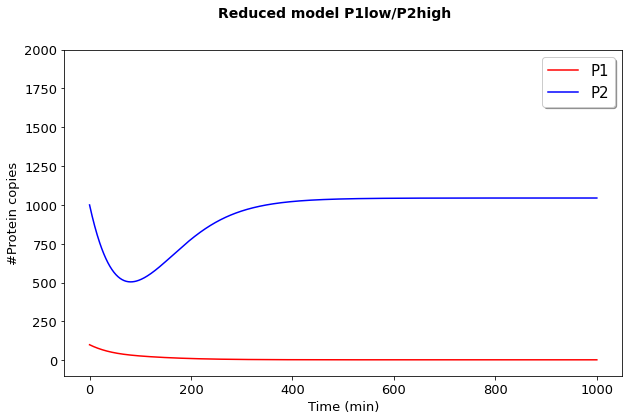

In [3]:
#Reduced model simulation highP2/lowP1

def sdot_toggle(s,t,params):
    # define parametres and variables
    P1, P2 = s
    kp1, kp2, kdp1, kdp2, K1, K2, n1, n2 = params
    
    # define ODE rate equations
    rate_P1_production = kp1 * ((K2**n2)/(P2**n2 + K2**n2))
    rate_P2_production = kp2 * ((K1**n1)/(P1**n1 + K1**n1))
    rate_P1_loss = -kdp1*P1
    rate_P2_loss = -kdp2*P2
    dP1 = rate_P1_production + rate_P1_loss
    dP2 = rate_P2_production + rate_P2_loss
    dsdt = [dP1, dP2]
    return dsdt

#params
kp1= 58.24
kp2= 17.38
#kp1= 0.9726
#kp2= 1.170
kdp1 = 0.0165
kdp2 = 0.0165
K1 = 31.94
K2 = 30.0
n1 = 2.0
n2 = 2.0
params = [kp1, kp2, kdp1, kdp2, K1, K2, n1, n2]

# define list of observation points 't_obs'
t_start = 0
t_end = 1000
n_obs = 1000
t_obs = np.linspace(t_start, t_end, n_obs)

# Define initial conditions
# Use the odeint function to simulate system
# unpack s_obs into variable observations
P1 = 100
P2 = 1000

s0 = [P1,P2]

s_obs = odeint(sdot_toggle, s0, t_obs, args=(params,))

P1_obs0 = s_obs[:,0]
P2_obs0 = s_obs[:,1]

print(f'P1ss = {P1_obs0[-1]}')
print(f'P2ss = {P2_obs0[-1]}')

# Plot results
fig = plt.figure(figsize=(10,6))
fig.suptitle('Reduced model P1low/P2high', 
              fontsize=14, fontweight='bold')
axes1 = fig.add_subplot(1,1,1)

axes1.plot(t_obs, P1_obs0, 'r-', label='P1')
axes1.plot(t_obs, P2_obs0, 'b-', label='P2')

axes1.set_ylabel('#Protein copies')
axes1.set_xlabel('Time (min)')

axes1.xaxis.label.set_size(13)
axes1.yaxis.label.set_size(13)
axes1.xaxis.set_tick_params(labelsize=13)
axes1.yaxis.set_tick_params(labelsize=13)

axes1.set_ylim(-100,2000)
axes1.legend(loc = 'upper right', prop={'size': 15}, shadow=True)

plt.savefig('reduced_2.png');